# Example of dataset using environmental rasters and sentinel imagery

This is an example code of how tu use provided data providers and dataset to create a pytorch dataset based on patches data.

## Imports
Importing the providers and dataset objects:

In [2]:
from data.GLC23PatchesProviders import MultipleRasterPatchProvider, RasterPatchProvider, JpegPatchProvider
from data.GLC23Datasets import PatchesDataset, PatchesDatasetMultiLabel

## Providers

Define the list of providers: Providers are datareaders specific to a type of patch. ``JpegPatchProvider`` allows to find and load a jpeg patches from a 'patchID', ``MultipleRasterPatchProvider`` and ``RasterPatchProvider`` allow to read in one or multiple rasters to extract patches given coordinates. You need to configure the list of providers for the data you want to include in the tensor.

In [3]:
data_path = 'data/sample_data/' # root path of the data
# configure providers
p_hfp_d = MultipleRasterPatchProvider(data_path+'EnvironmentalRasters/HumanFootprint/detailed/') # take all rasters from human footprint detailed (2 rasters here)
p_bioclim = MultipleRasterPatchProvider(data_path+'EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/', select=['bio1', 'bio2']) # take only bio1 and bio2 from bioclimatic rasters (2 rasters from the 3 in the folder)
p_hfp_s = RasterPatchProvider(data_path+'EnvironmentalRasters/HumanFootprint/summarized/HFP2009_WGS84.tif') # take the human footprint 2009 summurized raster (a single raster)
p_rgb = JpegPatchProvider(data_path+'SatelliteImages/') # take all sentinel imagery layers (r,g,b,nir = 4 layers)

## Dataset

Construct the dataset object given the list of providers and the occurrences csv file: The ``PatchesDataset`` class inherits from the ``Dataset`` class of ``torch.utils.data``.

In [4]:
# create dataset
dataset = PatchesDataset(
    occurrences=data_path+'Presence_only_occurrences/Presences_only_train_sample.csv',
    providers=(p_hfp_d, p_bioclim, p_hfp_s, p_rgb))

In [4]:
dataset[0][0].shape

torch.Size([9, 128, 128])

In [5]:
dataset[0][1]

9343

In [5]:
presence_only = PatchesDatasetMultiLabel(
    occurrences=data_path+'Presence_only_occurrences/Presences_only_train_sample.csv', providers=[p_hfp_d, p_bioclim, p_hfp_s, p_rgb]
)
print(len(presence_only))
print(presence_only[0][0].shape, presence_only[0][1].shape)

100
torch.Size([9, 128, 128]) torch.Size([100])


In [6]:
presence_absence = PatchesDatasetMultiLabel(
    occurrences=data_path+'Presence_Absences_occurrences/Presences_Absences_train_sample.csv', providers=[p_hfp_d, p_bioclim, p_hfp_s, p_rgb]
)
print(len(presence_absence))
print(presence_absence[0][0].shape, presence_absence[0][1].shape)

CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/77/67/116777.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/77/67/116777.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/77/67/116777.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/nir/77/67/116777.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/77/67/116777.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/77/67/116777.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/77/67/116777.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/nir/77/67/116777.jpeg properly. Setting array to 0.


100
torch.Size([9, 128, 128]) torch.Size([100])


## Examples of patches

After construction the ``PatchesDataset`` can return a tensor given an index of data.
Testing the dataset on random occurrences from the sample data:

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 9607


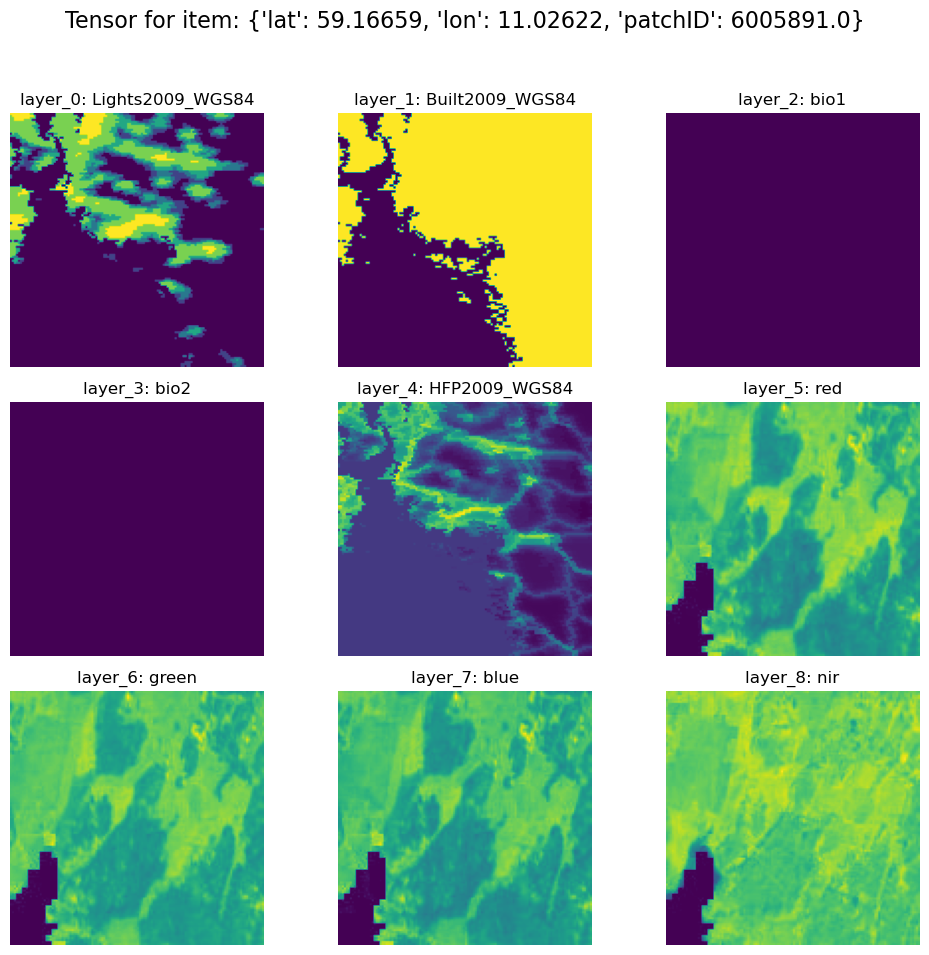

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 3852


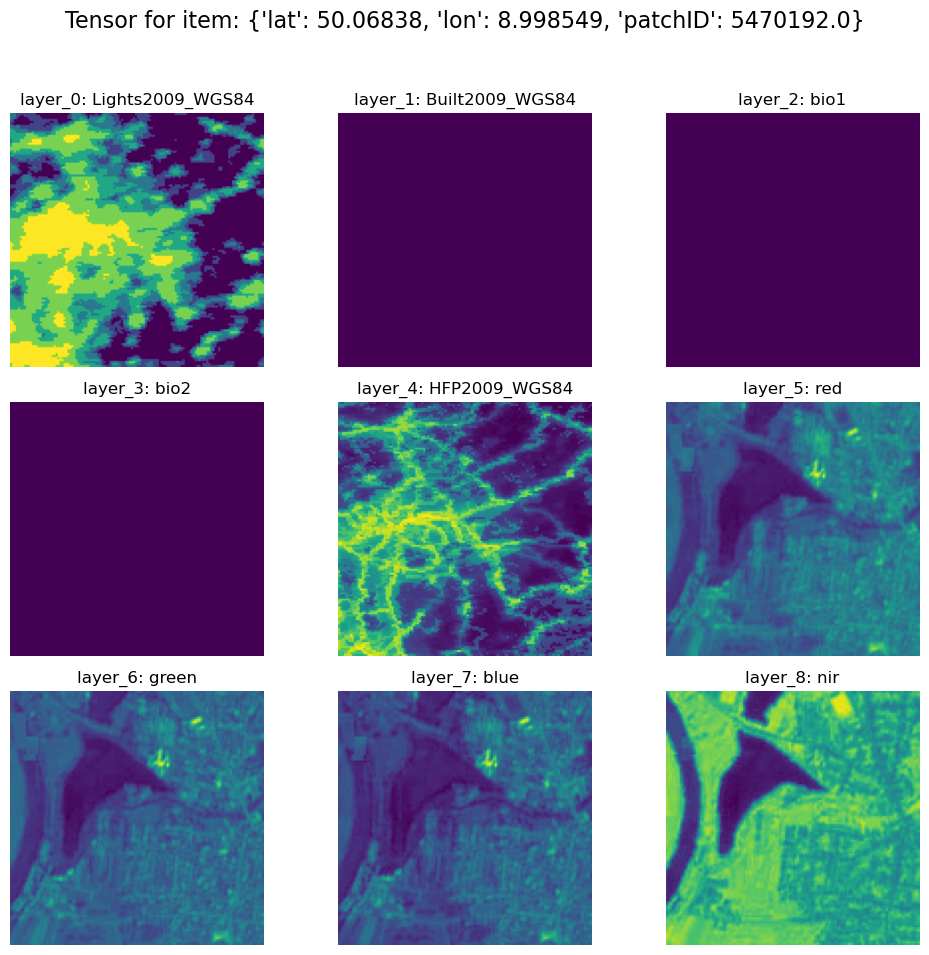

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 2165


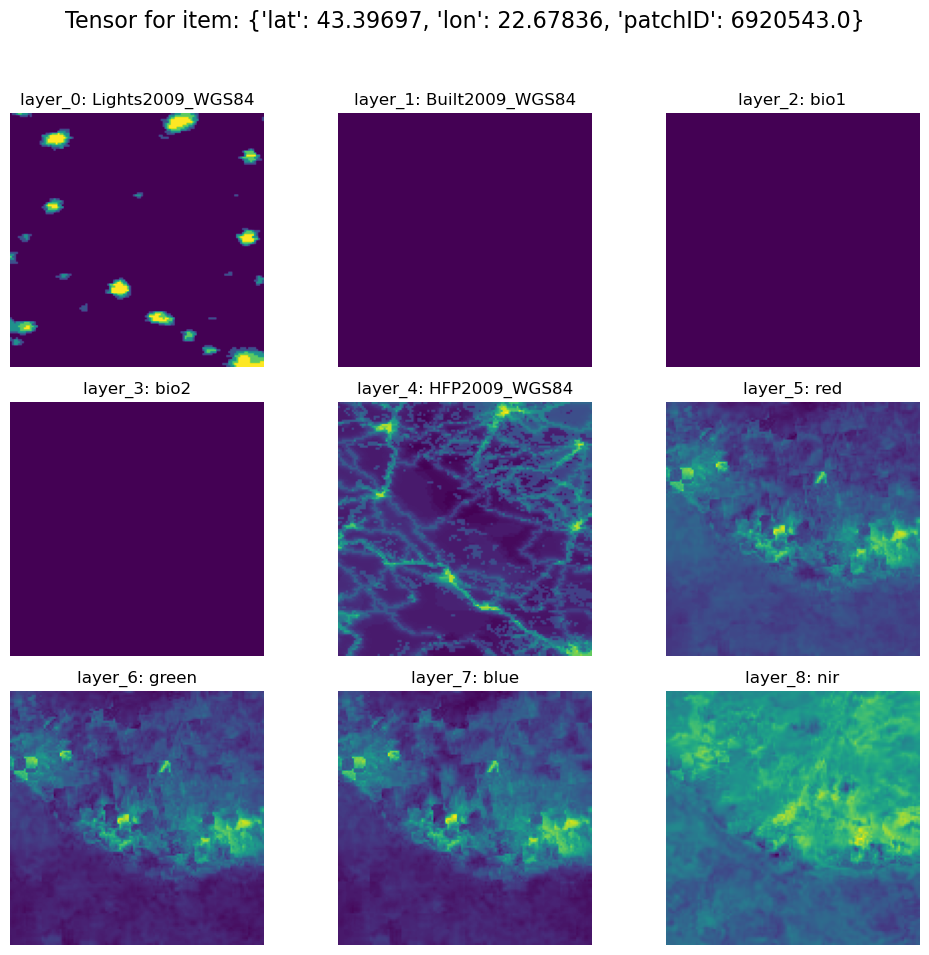

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 9669


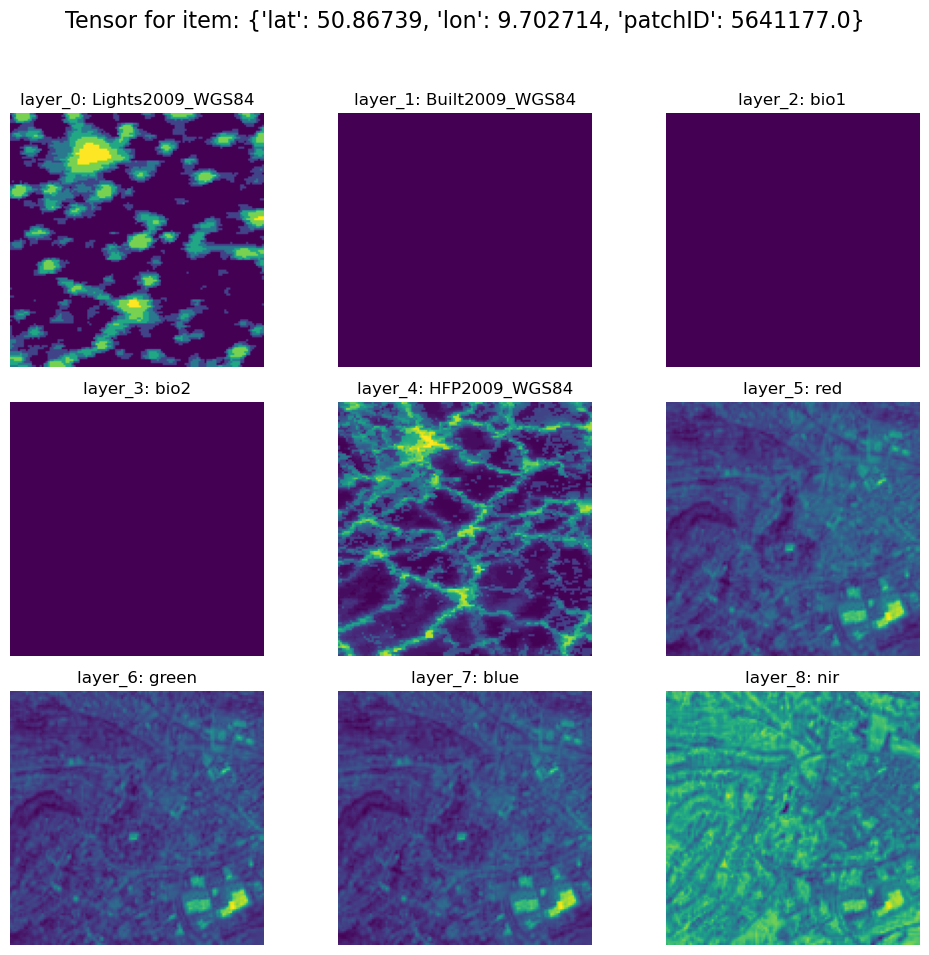

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 3704


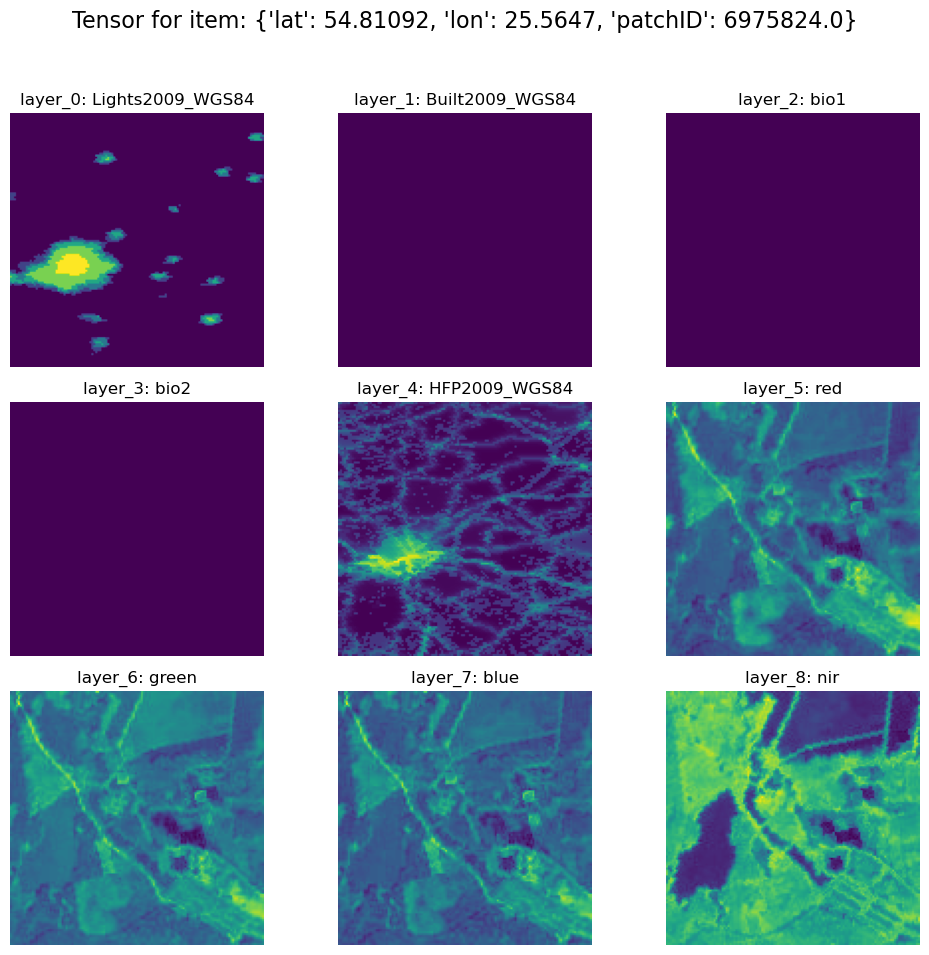

In [4]:
import random

# print random tensors from dataset
ids = [random.randint(0, len(dataset)-1) for i in range(5)]
for id in ids:
    tensor, label = dataset[id]
    print('Tensor type: {}, tensor shape: {}, label: {}'.format(type(tensor), tensor.shape, label))
    dataset.plot_patch(id)

## Torch dataloader

The ``PatchesDataset`` can be then wrapped in a torch dataloader:

In [7]:
import torch

train_loader = torch.utils.data.DataLoader(presence_only, shuffle=True, batch_size=64,  num_workers=8)

first_batch_tensor, first_batch_labels = next(iter(train_loader))
#print(first_batch_tensor)
print(first_batch_tensor.shape)
print(first_batch_labels.shape)

torch.Size([64, 9, 128, 128])
torch.Size([64, 100])


In [20]:
presence_absence

In [13]:
val_loader = torch.utils.data.DataLoader(presence_absence, shuffle=True, batch_size=len(presence_absence),  num_workers=8)

first_batch_tensor, first_batch_labels = next(iter(val_loader))
#print(first_batch_tensor)
print(first_batch_tensor.shape)
print(first_batch_labels.shape)

CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/82/32/3003282.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/82/32/3003282.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/82/32/3003282.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/nir/82/32/3003282.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/24/33/3013324.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/24/33/3013324.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/24/33/3013324.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/nir/24/33/3013324.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/74/66/3016674.

torch.Size([100, 9, 128, 128])
torch.Size([100, 100])


In [15]:
from models import cnn

In [16]:
model = cnn()
model

cnn(
  (conv1): Conv2d(9, 32, kernel_size=(3, 3), stride=(1, 1))
  (act1): ReLU()
  (pool1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (drop1): Dropout(p=0.3, inplace=False)
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (act2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc3): Linear(in_features=11552, out_features=512, bias=True)
  (act3): ReLU()
  (drop3): Dropout(p=0.5, inplace=False)
  (fc4): Linear(in_features=512, out_features=100, bias=True)
)

In [11]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
n_epochs = 20

In [12]:
from sklearn.metrics import roc_auc_score

In [19]:
avg_auc = []
for epoch in range(3):
    for inputs, labels in train_loader:
        # forward, backward, and then weight update
        y_pred = model(inputs)
        print(labels.shape, y_pred.shape)
        loss = loss_fn(y_pred, labels)
        print(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    
    for inputs, labels in val_loader:
        y_pred = model(inputs)

        y_pred = y_pred.detach().numpy()
        labels = labels.detach().numpy()
        print(y_pred.shape)
        print(labels.shape)
        labels_non_zero = labels[:, labels.sum(axis=0) != 0]
        y_pred_non_zero = y_pred[:, labels.sum(axis=0) != 0]
        print(y_pred_non_zero.shape)
        print(labels_non_zero.shape)

        auc_rocs = roc_auc_score(labels_non_zero, y_pred_non_zero, average=None)
        print(auc_rocs)

        avg_auc.append(auc_rocs.mean())
        print(f"{epoch}) AVG_AUC={auc_rocs.mean()}, {len(avg_auc)}, {avg_auc}")

        #print(y_pred)

        #acc += (torch.argmax(y_pred, 1) == labels).float().sum()
        #count += len(labels)
    #acc /= count
    #print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

#torch.save(model.state_dict(), "cifar10model.pth")

torch.Size([64, 100]) torch.Size([64, 100])
tensor(4.9450, dtype=torch.float64, grad_fn=<DivBackward1>)
torch.Size([36, 100]) torch.Size([36, 100])
tensor(5.0307, dtype=torch.float64, grad_fn=<DivBackward1>)


CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/36/84/128436.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/36/84/128436.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/36/84/128436.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/nir/36/84/128436.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/95/41/3004195.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/95/41/3004195.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/95/41/3004195.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/nir/95/41/3004195.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/02/70/127002.jpeg 

(100, 100)
(100, 100)
(100, 100)
(100, 100)
[0.19191919 0.96969697 0.95959596 0.68686869 0.81818182 0.58163265
 0.73469388 0.16161616 0.82142857 0.39795918 0.42346939 0.59183673
 0.55612245 0.46938776 0.39393939 0.28282828 0.66666667 0.36363636
 0.3030303  0.17171717 0.64646465 0.43434343 0.43434343 0.38383838
 0.51515152 0.02020202 0.36363636 0.52525253 0.94949495 0.71821306
 0.69072165 0.45017182 0.78787879 0.62626263 0.45454545 0.58585859
 0.45454545 0.40306122 0.53061224 0.70707071 0.02020202 0.70707071
 0.         0.37373737 0.23469388 0.84848485 0.01010101 0.37373737
 0.46938776 0.10204082 0.62626263 0.01010101 0.15151515 0.01010101
 0.49494949 0.55612245 0.48484848 0.19931271 0.32302405 0.48797251
 0.46428571 0.37244898 0.57575758 0.51020408 0.60714286 0.80808081
 0.03030303 0.44444444 0.09090909 0.66666667 0.44791667 0.30729167
 0.7734375  0.17447917 0.28282828 0.45454545 0.75757576 0.33333333
 0.28282828 0.08080808 0.81818182 0.57653061 0.34183673 0.78787879
 0.74914089 0.5670

CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/06/71/3007106.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/06/71/3007106.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/06/71/3007106.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/nir/06/71/3007106.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/24/57/105724.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/24/57/105724.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/24/57/105724.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/nir/24/57/105724.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/27/96/119627.jpeg 

(100, 100)
(100, 100)
(100, 100)
(100, 100)
[0.34343434 1.         0.29292929 0.81818182 0.60606061 0.1377551
 0.58163265 0.45454545 0.79591837 0.5        0.2244898  0.79081633
 0.32653061 0.35204082 0.01010101 0.71717172 0.94949495 0.76767677
 0.87878788 0.43434343 0.50505051 0.38383838 0.83838384 0.66666667
 0.74747475 0.81818182 0.56565657 0.74747475 0.38383838 0.46391753
 0.53264605 0.58075601 0.71717172 0.32323232 0.09090909 0.33333333
 0.26262626 0.72959184 0.84183673 0.32323232 0.13131313 0.85858586
 0.97979798 0.11111111 0.57653061 0.33333333 0.52525253 0.31313131
 0.30102041 0.57653061 0.56565657 0.3030303  0.31313131 0.87878788
 0.57575758 0.53571429 0.12121212 0.5532646  0.38831615 0.42268041
 0.46428571 0.18367347 0.05050505 0.35714286 0.75510204 0.78787879
 0.49494949 0.05050505 0.34343434 0.90909091 0.61458333 0.34895833
 0.45052083 0.37239583 0.3030303  0.23232323 0.50505051 0.43434343
 0.44444444 0.37373737 0.47474747 0.52040816 0.16836735 0.02020202
 0.23367698 0.26804

CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/70/47/3004770.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/70/47/3004770.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/70/47/3004770.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/nir/70/47/3004770.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/18/53/115318.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/18/53/115318.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/18/53/115318.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/nir/18/53/115318.jpeg properly. Setting array to 0.
CRITICAL:root:Could not open data/sample_data/SatelliteImages/rgb/20/27/3012720.jpeg

(100, 100)
(100, 100)
(100, 100)
(100, 100)
[0.63636364 0.1010101  0.44444444 0.57575758 0.7979798  0.41326531
 0.84693878 0.75757576 0.64795918 0.69897959 0.2244898  0.39795918
 0.61734694 0.68877551 0.4040404  0.68686869 0.80808081 0.48484848
 0.98989899 0.43434343 0.66666667 0.78787879 0.31313131 0.84848485
 0.86868687 0.71717172 0.26262626 0.29292929 0.15151515 0.62886598
 0.44329897 0.74914089 0.6969697  0.22222222 0.96969697 0.35353535
 0.62626263 0.87244898 0.12755102 0.15151515 0.04040404 0.35353535
 0.1010101  0.91919192 0.3877551  0.6969697  0.35353535 0.94949495
 0.81632653 0.60204082 0.96969697 0.50505051 0.66666667 0.86868687
 1.         0.44387755 0.92929293 0.58419244 0.40206186 0.4604811
 0.45408163 0.72959184 0.04040404 0.58163265 0.06122449 0.23232323
 0.44444444 0.82828283 0.95959596 0.85858586 0.54166667 0.22395833
 0.4765625  0.24739583 0.33333333 0.1010101  0.61616162 0.3030303
 0.4040404  0.97979798 0.4040404  0.55612245 0.51020408 0.09090909
 0.67697595 0.268041

In [ ]:
    pred = torch.sigmoid(model(torch.tensor(x, dtype=torch.float32, device=device)))
    
    # Loss function in pytorch
    if loss_fn is not None:
        loss = loss_fn(pred, torch.tensor(y, dtype=torch.float32, device=device)).cpu().detach()
    else:
        loss = None
    
    # Metrics in numpy
    pred = pred.cpu().detach().numpy()
    if indices_non_zeros_samples is not None:
        
        y_non_zeros_samples = y[:, indices_non_zeros_samples]
        pred_non_zeros_samples = pred[:, indices_non_zeros_samples]
        
        auc_rocs = roc_auc_score(y_non_zeros_samples, pred_non_zeros_samples, average=None)
        auc_prgs = []
        cors = []
        for j in range(len(y_non_zeros_samples[0])):
            prg_curve = create_prg_curve(y_non_zeros_samples[:, j], pred_non_zeros_samples[:, j])
            auc_prgs.append(calc_auprg(prg_curve))
            cors.append(pearsonr(y_non_zeros_samples[:, j], pred_non_zeros_samples[:, j]).statistic)
    else:
        auc_rocs = roc_auc_score(y, pred, average=None)
        auc_prgs = []
        cors = []
        for j in range(len(y[0])):
            prg_curve = create_prg_curve(y[:, j], pred[:, j])
            auc_prgs.append(calc_auprg(prg_curve))
            cors.append(pearsonr(y[:, j], pred[:, j]).statistic)
    return loss, auc_rocs, auc_prgs, cors

In [ ]:
 if config["model_path"] is not None:
        model = torch.load(config["model_path"])
    else:
        model = MLP(input_size=x_train.shape[1], output_size=config["num_species"], num_layers=config["num_layers"], 
                width=config["width_MLP"], dropout=config["dropout"]).to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=config["learning_rate"], weight_decay=config["weight_decay"])
    lr_lambda = lambda epoch: config["learning_rate_decay"] ** epoch
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lr_lambda)

    # Loss
    weight = (len(y_train) - np.sum(y_train, axis=0))/np.sum(y_train, axis=0)
    print("weight of presences: {}".format(weight))
    
    def loss_fn(pred, target):
        if config["with_co_background"]:
            loss = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(weight)).to(device)(pred, target)
        else:
            # We multiply the predictions by the target (binary mask) to remove the co background points
            mask = target.clone().detach()
            mask[torch.where(torch.sum(mask, axis=1) == 0)[0]] = 1
            loss = torch.mul(nn.BCEWithLogitsLoss(pos_weight=torch.tensor(weight), reduction="none").to(device)(pred, target), mask).mean()
        return loss

    # Training
    best_val_auc_roc = 0
    best_model = None
    model.train()

    for i in range(config["epochs"]):

        if i > 0: 
            scheduler.step()

        for x_batch, y_batch in trainloader:

            # Forward pass
            output = model(x_batch)
            train_loss = loss_fn(output, y_batch)

            # Backward pass
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()
        
        if i % 2 == 0 or log_all:
            
            # Print metrics for train and test set
            with torch.no_grad():

                train_loss, train_auc_rocs, train_auc_prgs, train_cors = compute_metrics(model, x_train, y_train, loss_fn, indices_non_zeros_samples, device)
                mean_train_auc_roc = np.mean(train_auc_rocs)
                mean_train_auc_prg = np.mean(train_auc_prgs)
                mean_train_cor = np.mean(train_cors)